In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Anomaly detection/clustered dataset')

In [3]:
df.head()

,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source,clusters_labels
0,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Segment C,Log Data,Alert Data,Firewall,0
1,ICMP,1022,Data,DNS,Amet libero optio quidem praesentium libero. E...,IoC Detected,54.05,Alert Triggered,Intrusion,Known Pattern A,Logged,High,Segment A,Log Data,Alert Data,Firewall,1
2,TCP,554,Control,DNS,Voluptate mollitia cupiditate necessitatibus n...,IoC Detected,97.82,Alert Triggered,Malware,Known Pattern B,Blocked,High,Segment A,Log Data,Alert Data,Firewall,0
3,ICMP,1178,Data,HTTP,Eaque deserunt nemo ad voluptate. Aliquid rem ...,IoC Detected,5.39,Alert Triggered,Malware,Known Pattern B,Ignored,High,Segment C,Log Data,Alert Data,Server,1
4,ICMP,765,Control,DNS,Dolores vitae neque velit maiores.\nReprehende...,IoC Detected,47.31,Alert Triggered,Intrusion,Known Pattern A,Blocked,Low,Segment C,Log Data,Alert Data,Server,0


In [4]:
df['Malware Indicators'].value_counts()

Malware Indicators
IoC Detected    1237
Name: count, dtype: int64

In [5]:
df['Alerts/Warnings'].value_counts()

Alerts/Warnings
Alert Triggered    1237
Name: count, dtype: int64

In [6]:
df['Firewall Logs'].value_counts()

Firewall Logs
Log Data    1237
Name: count, dtype: int64

In [7]:
df['IDS/IPS Alerts'].value_counts()

IDS/IPS Alerts
Alert Data    1237
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Protocol            1237 non-null   object 
 1   Packet Length       1237 non-null   int64  
 2   Packet Type         1237 non-null   object 
 3   Traffic Type        1237 non-null   object 
 4   Payload Data        1237 non-null   object 
 5   Malware Indicators  1237 non-null   object 
 6   Anomaly Scores      1237 non-null   float64
 7   Alerts/Warnings     1237 non-null   object 
 8   Attack Type         1237 non-null   object 
 9   Attack Signature    1237 non-null   object 
 10  Action Taken        1237 non-null   object 
 11  Severity Level      1237 non-null   object 
 12  Network Segment     1237 non-null   object 
 13  Firewall Logs       1237 non-null   object 
 14  IDS/IPS Alerts      1237 non-null   object 
 15  Log Source          1237 non-null   object 
 16  cluste

In [9]:
df.describe()

,Packet Length,Anomaly Scores,clusters_labels
count,1237.000000,1237.000000,1237.000000
mean,784.832660,50.048593,0.502829
std,419.686322,28.754095,0.500194
min,64.000000,0.030000,0.000000
25%,416.000000,26.970000,0.000000
50%,791.000000,48.990000,1.000000
75%,1159.000000,75.170000,1.000000
max,1500.000000,99.980000,1.000000


In [10]:
df = df.drop(['Payload Data' , 'Malware Indicators' , 'Alerts/Warnings' , 'IDS/IPS Alerts' , 'Firewall Logs' , 'Severity Level', 'Network Segment',
       'Log Source' , 'Attack Type',
       'Attack Signature', 'Action Taken'] , axis = 1)
#df = df.drop(['Payload Data' , 'Malware Indicators' , 'Alerts/Warnings' , 'IDS/IPS Alerts' , 'Firewall Logs'] , axis = 1)

In [11]:
categorical_features = df.select_dtypes(include = ['object' , 'bool']).columns

In [12]:
categorical_features

Index(['Protocol', 'Packet Type', 'Traffic Type'], dtype='object')

In [13]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
encoded_data = ohe.fit_transform(df[categorical_features])
# Fit and transform the categorical variable
encoded_data = ohe.fit_transform(df[categorical_features])

# Get the feature names after one-hot encoding
feature_names = ohe.get_feature_names_out(categorical_features)

# Create a new DataFrame with one-hot encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Drop the original categorical columns from the DataFrame
df.drop(columns=categorical_features, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Save the final DataFrame with one-hot encoding to a new CSV file
#final_df.to_csv('encoded_data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
df.head()

,Packet Length,Anomaly Scores,clusters_labels,Protocol_ICMP,Protocol_TCP,Protocol_UDP,Packet Type_Control,Packet Type_Data,Traffic Type_DNS,Traffic Type_FTP,Traffic Type_HTTP
0,306,87.42,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1022,54.05,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,554,97.82,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1178,5.39,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,765,47.31,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [15]:
df.columns

Index(['Packet Length', 'Anomaly Scores', 'clusters_labels', 'Protocol_ICMP',
       'Protocol_TCP', 'Protocol_UDP', 'Packet Type_Control',
       'Packet Type_Data', 'Traffic Type_DNS', 'Traffic Type_FTP',
       'Traffic Type_HTTP'],
      dtype='object')

In [16]:
#x = df.drop(['Malware Indicators' , 'Malware Indicators' , 'Firewall Logs' , 'IDS/IPS Alerts' , 'clusters_labels'] , axis = 1)
x = df.drop(['clusters_labels'] , axis = 1)

y = df['clusters_labels']

In [17]:
x.head()

,Packet Length,Anomaly Scores,Protocol_ICMP,Protocol_TCP,Protocol_UDP,Packet Type_Control,Packet Type_Data,Traffic Type_DNS,Traffic Type_FTP,Traffic Type_HTTP
0,306,87.42,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1022,54.05,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,554,97.82,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1178,5.39,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,765,47.31,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [18]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: clusters_labels, dtype: int64

In [19]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
x_scaled = mms.fit_transform(x)
df1 = pd.DataFrame(x_scaled)

df1.head()

,0,1,2,3,4,5,6,7,8,9
0,0.168524,0.874337,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.667131,0.540470,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.341226,0.978389,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.775766,0.053627,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.488162,0.473037,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [20]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(x_scaled)

In [21]:
x_pca.shape

(1237, 10)

In [22]:
pca.n_components_

10

In [23]:
pca.explained_variance_ratio_

array([2.51614956e-01, 1.76459961e-01, 1.68769555e-01, 1.61418855e-01,
       1.58094839e-01, 4.27945044e-02, 4.08473302e-02, 1.32542646e-32,
       6.75933369e-33, 2.84980449e-33])

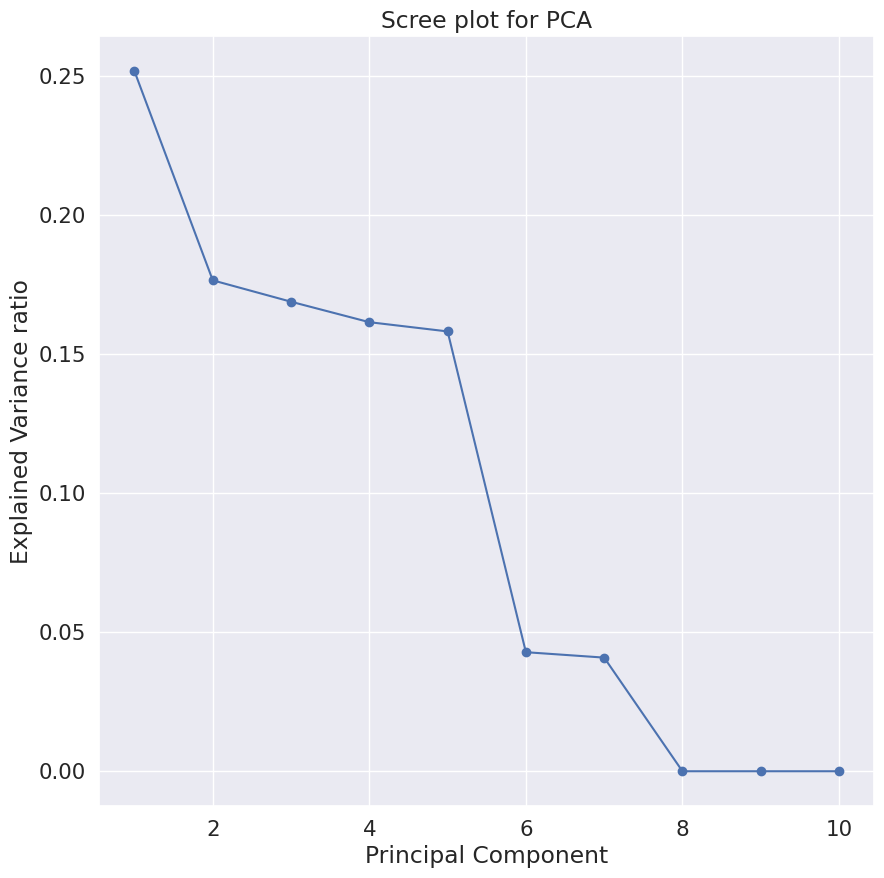

In [24]:
plt.figure(figsize = (10 , 10))
sns.set(font_scale=1.4)
fig = plt.gcf()
plt.plot(range(1 , pca.n_components_ + 1) , pca.explained_variance_ratio_ , marker = 'o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance ratio')
plt.title('Scree plot for PCA')
plt.grid(True)
fig.savefig('Scree plot for PCA.pdf' , dpi = fig.dpi)

In [25]:
pcaa = PCA(n_components = 8)
x_pcaa = pcaa.fit_transform(x_scaled)

In [26]:
x_pcaa.shape

(1237, 8)

In [27]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x_pcaa , y , test_size = 0.2 , random_state = 42)

In [28]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(989, 8) (248, 8) (989,) (248,)


In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(x_train , y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
y_pred_dtc_norm = dtc.predict(x_test)
y_pred_dtc_norm

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0])

In [31]:
accuracy_score_dtc = accuracy_score(y_test, y_pred_dtc_norm)

report_dtc = classification_report(y_test, y_pred_dtc_norm)

print("Classification Report:")
print(report_dtc)
print("accuracy_score:")
print(accuracy_score_dtc * 100)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       120
           1       0.98      0.97      0.98       128

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248

accuracy_score:
97.58064516129032


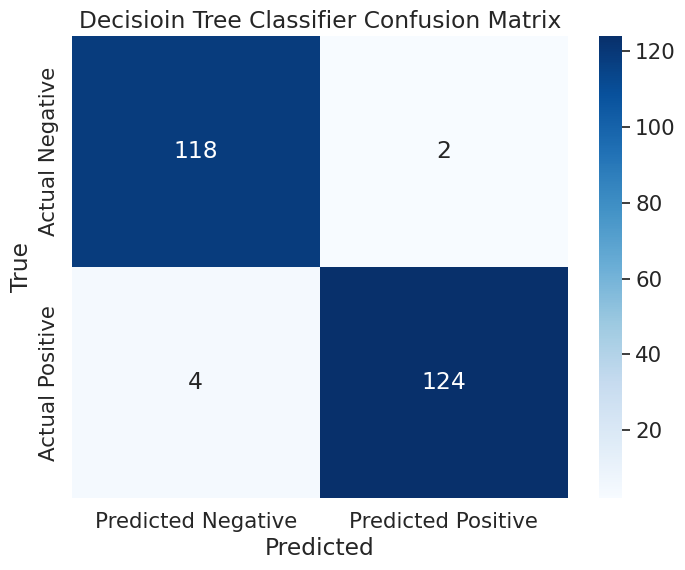

In [32]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_dtc_norm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
fig = plt.gcf()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decisioin Tree Classifier Confusion Matrix')
fig.savefig('confusion_matrix_dt.pdf' , dpi = fig.dpi)

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with a specific number of trees
n_trees = 100  # Set the number of trees
rfc = RandomForestClassifier()

# Train the Random Forest model
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
y_pred_rfc = rfc.predict(x_test)

In [35]:
accuracy_score_rfc = accuracy_score(y_test, y_pred_rfc)

report_rfc = classification_report(y_test, y_pred_rfc)

print("Classification Report:")
print(report_rfc)
print("accuracy_score:")
print(accuracy_score_rfc * 100)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       120
           1       0.97      0.98      0.97       128

    accuracy                           0.97       248
   macro avg       0.97      0.97      0.97       248
weighted avg       0.97      0.97      0.97       248

accuracy_score:
97.17741935483872


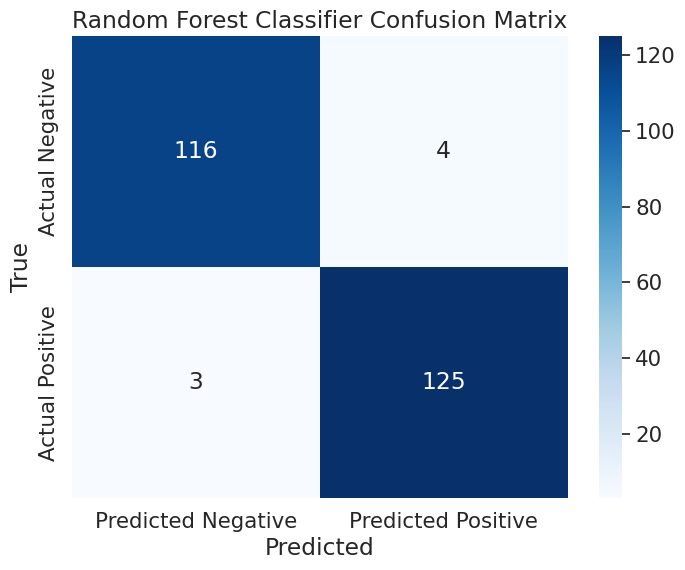

In [36]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_rfc)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Classifier Confusion Matrix')
fig = plt.gcf()
fig.savefig('random_forest_cm.pdf' , dpi = fig.dpi)

In [37]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train , y_train)
y_pred_gnb = gnb.predict(x_test)
y_pred_gnb

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1])

In [38]:
accuracy_score_gnb = accuracy_score(y_test, y_pred_gnb)

report_gnb = classification_report(y_test, y_pred_gnb)

print("Classification Report:")
print(report_gnb)
print("accuracy_score:")
print(accuracy_score_gnb * 100)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       120
           1       0.95      0.92      0.94       128

    accuracy                           0.94       248
   macro avg       0.94      0.94      0.94       248
weighted avg       0.94      0.94      0.94       248

accuracy_score:
93.54838709677419


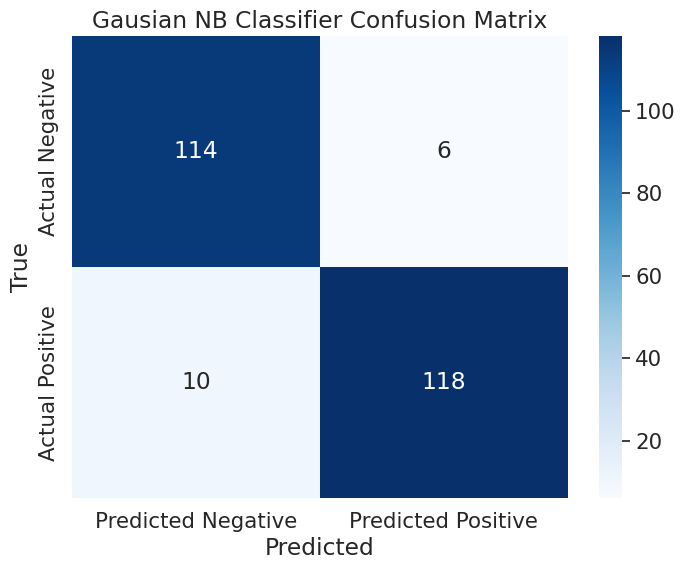

In [39]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_gnb)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Gausian NB Classifier Confusion Matrix')
fig = plt.gcf()
fig.savefig('gaussian_nb_cm.pdf' , dpi = fig.dpi)

In [40]:
from lightgbm import LGBMClassifier

lgbmc = LGBMClassifier()
lgbmc.fit(x_train , y_train)
y_pred_lgbmc = lgbmc.predict(x_test)
y_pred_lgbmc

[LightGBM] [Info] Number of positive: 494, number of negative: 495
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 989, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499494 -> initscore=-0.002022
[LightGBM] [Info] Start training from score -0.002022
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0])

In [41]:
accuracy_score_lgbmc = accuracy_score(y_test, y_pred_lgbmc)

report_lgbmc = classification_report(y_test, y_pred_lgbmc)

print("Classification Report:")
print(report_lgbmc)
print("accuracy_score:")
print(accuracy_score_lgbmc * 100)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       120
           1       0.99      0.98      0.99       128

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248

accuracy_score:
98.79032258064517


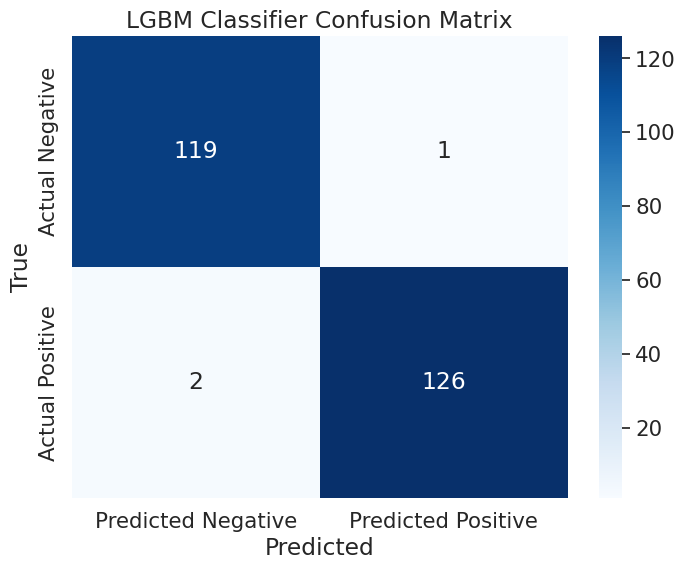

In [42]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_lgbmc)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
fig = plt.gcf()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LGBM Classifier Confusion Matrix')
fig.savefig('LGBM_Classifier_Confusion_Matrix.pdf' , dpi = fig.dpi)

In [43]:
!pip install catboost
from catboost import CatBoostClassifier

cbc = CatBoostClassifier()
cbc.fit(x_train , y_train)
y_pred_cbc = cbc.predict(x_test)
y_pred_cbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.4 MB/s eta 0:00:00
Learning rate set to 0.010254
0:	learn: 0.6786259	total: 61.6ms	remaining: 1m 1s
1:	learn: 0.6632873	total: 72.2ms	remaining: 36s
2:	learn: 0.6503366	total: 79ms	remaining: 26.3s
3:	learn: 0.6328158	total: 84.3ms	remaining: 21s
4:	learn: 0.6181908	total: 97.5ms	remaining: 19.4s
5:	learn: 0.6026321	total: 103ms	remaining: 17s
6:	learn: 0.5846530	total: 110ms	remaining: 15.7s
7:	learn: 0.5722826	total: 122ms	remaining: 15.1s
8:	learn: 0.5595905	total: 127ms	remaining: 14s
9:	learn: 0.5511939	total: 138ms	remaining: 13.7s
10:	learn: 0.5353791	total: 144ms	remaining: 12.9s
11:	learn: 0.5221776	total: 153ms	remaining: 12.6s
12:	learn: 0.5078651	total: 159ms	remaining: 12.1s
13:	learn: 0.4953951	total: 164ms	remaining: 11.6s
14:	learn: 0.4821156	total: 168ms	remaining: 11s
15:	learn: 0.4726431	total: 175ms	remaining: 10.8s
16:	learn: 0.4649290	total: 184ms	remaining: 10.6s
17:	learn: 0.4571766	total: 194ms	remain

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0])

In [44]:
accuracy_score_cbc = accuracy_score(y_test, y_pred_cbc)

report_cbc = classification_report(y_test, y_pred_cbc)

print("Classification Report:")
print(report_cbc)
print("accuracy_score:")
print(accuracy_score_cbc * 100)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       120
           1       0.98      0.98      0.98       128

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248

accuracy_score:
98.38709677419355


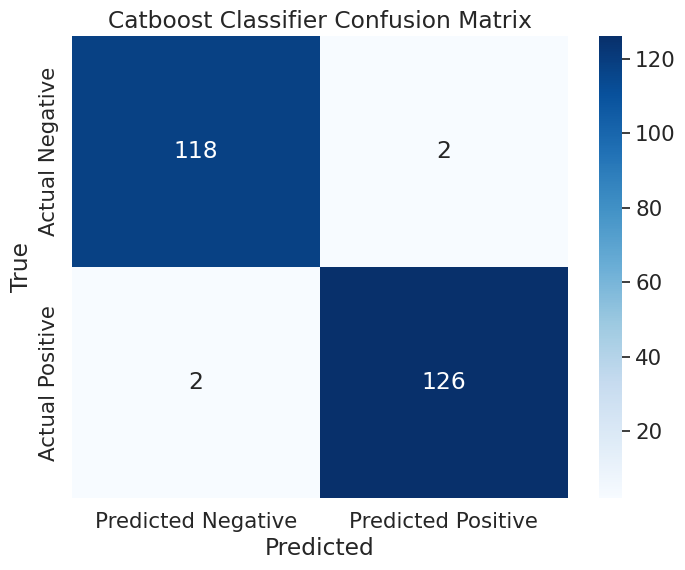

In [45]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_cbc)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
fig = plt.gcf()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Catboost Classifier Confusion Matrix')
fig.savefig('Catboost_Classifier_Confusion_Matrix.pdf' , dpi = fig.dpi)

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gb_clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_gbc = gb_clf.predict(x_test)


In [47]:
accuracy_score_gbc = accuracy_score(y_test, y_pred_gbc)

report_gbc = classification_report(y_test, y_pred_gbc)

print("Classification Report:")
print(report_gbc)
print("accuracy_score:")
print(accuracy_score_gbc * 100)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       120
           1       0.99      0.98      0.98       128

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248

accuracy_score:
98.38709677419355


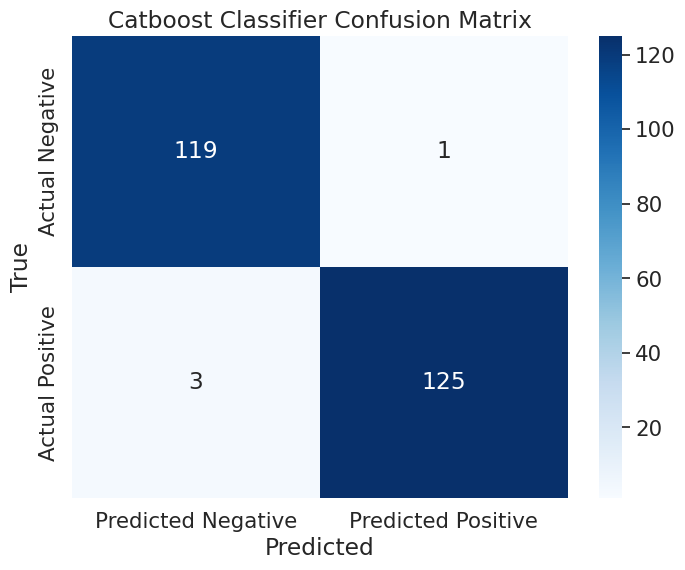

In [48]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_gbc)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
fig = plt.gcf()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Catboost Classifier Confusion Matrix')
fig.savefig('Catboost_Classifier_Confusion_Matrix.pdf' , dpi = fig.dpi)

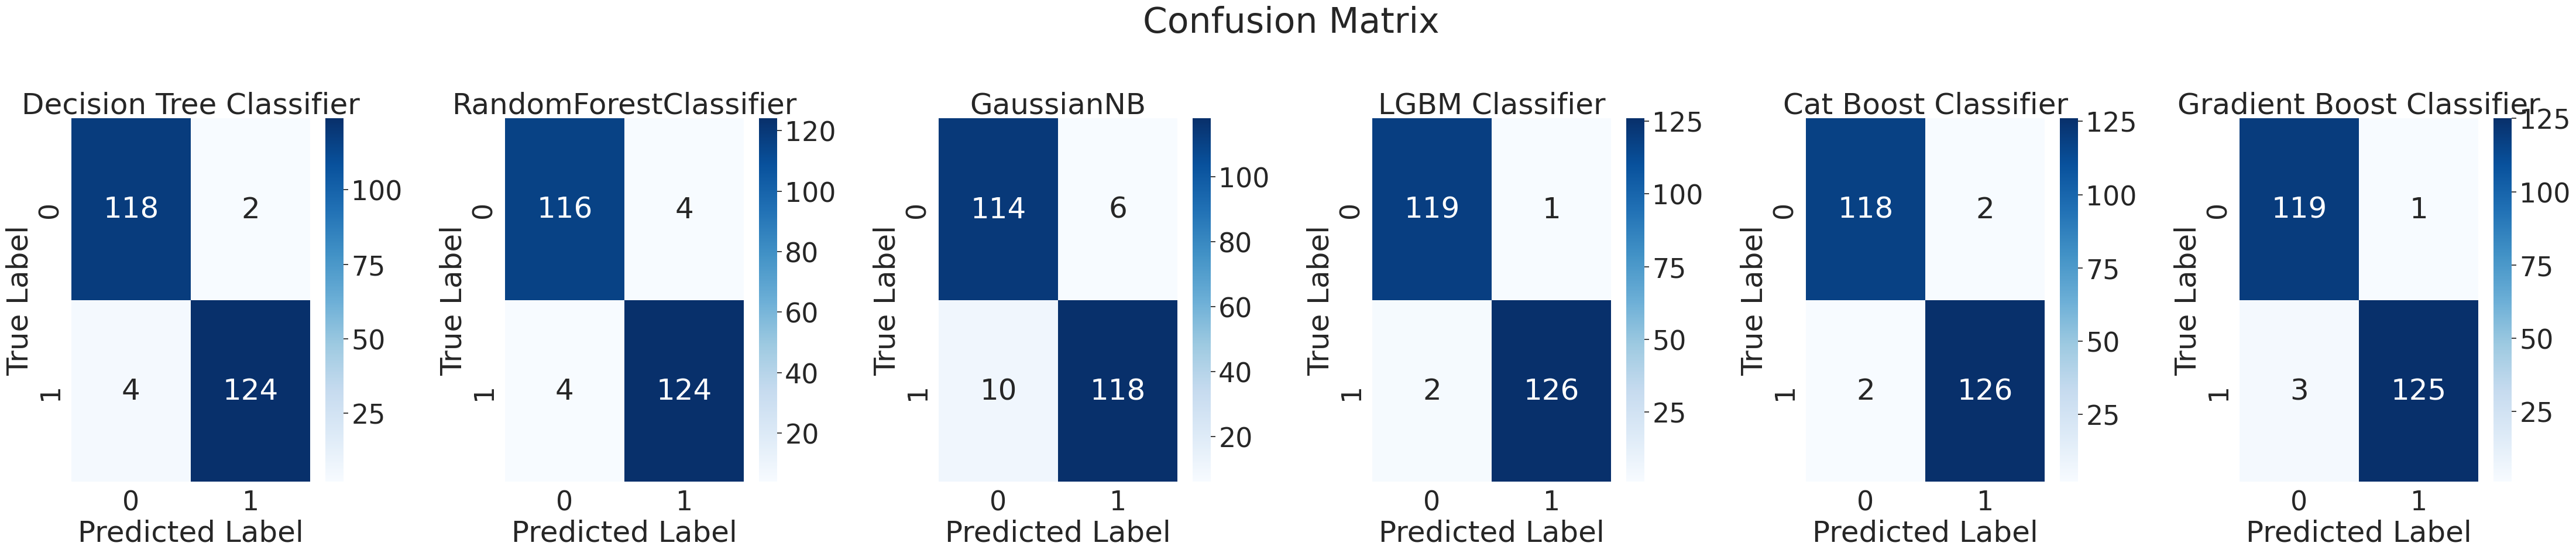

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Sample confusion matrix data for different models
# Replace these with the actual confusion matrices for your models
confusion_matrices = {
    'Decision Tree Classifier': np.array([[118, 2], [4, 124]]),
    'RandomForestClassifier': np.array([[116, 4], [4, 124]]),
    'GaussianNB': np.array([[114, 6], [10, 118]]),
    'LGBM Classifier': np.array([[119, 1], [2, 126]]),
    'Cat Boost Classifier': np.array([[118, 2], [2, 126]]),
    'Gradient Boost Classifier': np.array([[119, 1], [3, 125]])

}
sns.set(font_scale=3)
# Plotting the confusion matrices for each model in one graph
fig, axes = plt.subplots(1, len(confusion_matrices), figsize=(45, 10))
plt.suptitle('Confusion Matrix')
for i, (model, cm) in enumerate(confusion_matrices.items()):
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(model)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()
fig.savefig('confusion_matrix_custered data.pdf' , dpi = fig.dpi)


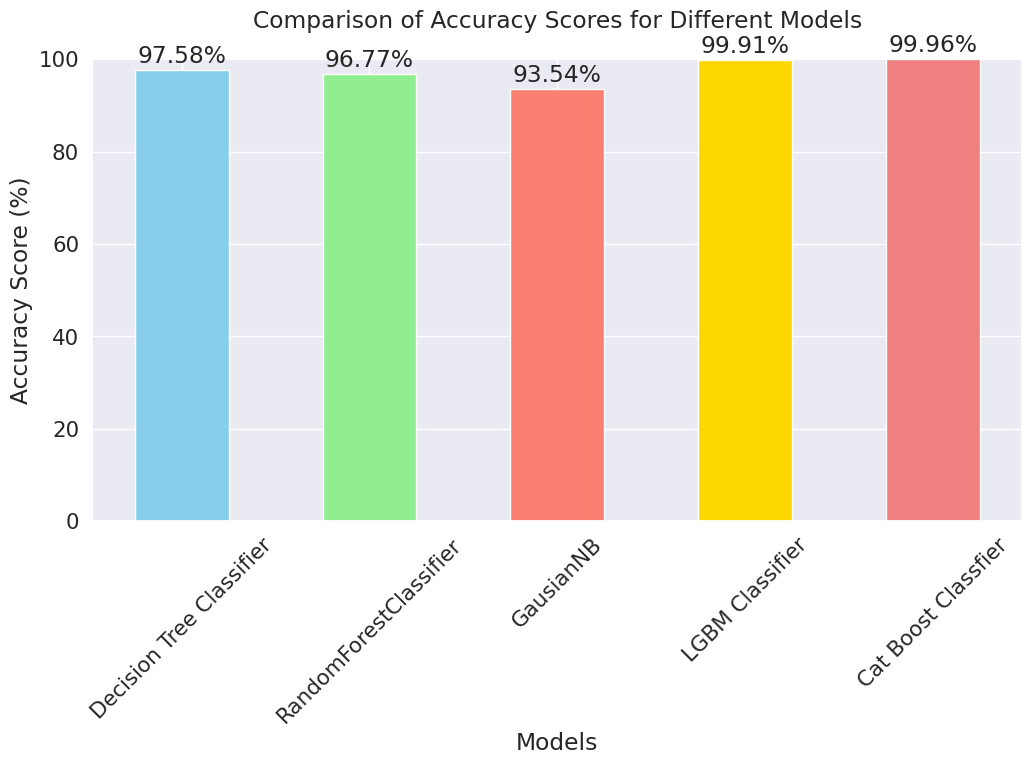

In [51]:
# Sample data for model names and accuracy scores
models = ['Decision Tree Classifier', 'RandomForestClassifier', 'GausianNB', 'LGBM Classifier', 'Cat Boost Classfier']
accuracy_scores = [97.58, 96.77, 93.54, 99.91, 99.96]

# Plotting the accuracy scores
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.4)
fig = plt.gcf()
bar_colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral']
bar_width = 0.5

plt.bar(models, accuracy_scores, color=bar_colors, width=bar_width)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy Score (%)')

# Shifting the title away from the graph by adjusting the 'y' parameter
plt.title('Comparison of Accuracy Scores for Different Models', y=1.05)

# Adding the accuracy scores on top of the bars with proper formatting
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.5, f'{score:.2f}%', ha='center', va='bottom')

plt.ylim(0, 100)  # Setting y-axis limits from 0 to 100 for percentage accuracy scores

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
fig.savefig('Comparison_of_Accuracy_Scores_for_Different_Models.pdf' , dpi = fig.dpi)